# This Python Jupyter Notebook will be used for IBM Capstone Project Development

In [1]:
import pandas as pd
import numpy as np

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Battle of Neighborhoods - Exploring the Neighborhoods around Johns Hopkins Carey Business School

### In 2019, Baltimore ranks the 4th most dangerous city in America, according to financial news website 247wallst.com. Baltimore’s violent crime rate in 2018, which was 1,833.4 per 100,000 people, is nearly five times higher than the national violent crime rate of 369 per 100,000 people. At the same time, properties some of the safest areas of Baltimore remained overly expensive for both buyers and renters. The disconnection between the housing market and the public not only arouses social uneasiness but also widens the economcic gap between working classes. 

### However, there is currently no accesible platform that would guide students attending JHU Carey Business School in the near future to choose which neighborhood to live in and make suggestion of which restaurants to go to. This project will give a brief introduction and offer some insights to the living environment of Inner Harbor, Baltimore, MD. 

## 1. Analysis of crime data of Baltimore
### Crime data will be pulled from the database of Baltimore Police Department. Data contains data, time, geographical location, type, neighborhood, etc. This data will show the crime rate in different neighborhoods of Baltimore.

In [3]:
# Url from Baltimore City Police Department
url = 'https://data.baltimorecity.gov/api/views/wsfq-mvij/rows.csv?accessType=DOWNLOAD'

In [4]:
# Load data from the website
df_crime = pd.read_csv(url)
df_crime.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,08/22/2020,13:41:00,6C,6900 HARFORD RD,LARCENY,I,NaN,424,NORTHEAST,NORTH HARFORD ROAD,-76.549523,39.366192,NaN,CONVENIENCE STORE,NaN,1
1,08/22/2020,21:30:00,7A,7200 CHALKSTONE DR,AUTO THEFT,O,NaN,631,NORTHWEST,FALLSTAFF,-76.707928,39.367376,NaN,PARKING LOT-OUTSIDE,NaN,1
2,08/22/2020,21:04:00,3K,1200 N PARRISH ST,ROBBERY - RESIDENCE,I,NaN,724,WESTERN,SANDTOWN-WINCHESTER,-76.642553,39.302549,NaN,ROW/TOWNHOUSE-OCC,Central,1
3,08/22/2020,22:00:00,6F,2700 MARYLAND AVE,LARCENY,O,NaN,512,NORTHERN,CHARLES VILLAGE,-76.618504,39.320909,NaN,YARD,NaN,1
4,08/22/2020,15:00:00,6D,2200 MOUNT ROYAL TER,LARCENY FROM AUTO,O,NaN,133,CENTRAL,RESERVOIR HILL,-76.628137,39.314651,NaN,STREET,NaN,1


In [5]:
# Only crime date and neighborhoods are needed for this project
df_crime = df_crime[['CrimeDate','Neighborhood']]
df_crime.head()

,CrimeDate,Neighborhood
0,08/22/2020,NORTH HARFORD ROAD
1,08/22/2020,FALLSTAFF
2,08/22/2020,SANDTOWN-WINCHESTER
3,08/22/2020,CHARLES VILLAGE
4,08/22/2020,RESERVOIR HILL


In [6]:
# Check the size of dataframe
df_crime.shape

(312191, 2)

In [7]:
# Drop null data
df_crime.dropna(axis = 0, inplace = True)
df_crime.shape

(301398, 2)

In [8]:
# Check data types 
df_crime.dtypes

CrimeDate       object
Neighborhood    object
dtype: object

In [9]:
# Group and count crime number by different neighborhoods
crime_by_nei = df_crime.groupby(['Neighborhood']).count().reset_index()
crime_by_nei

,Neighborhood,CrimeDate
0,000,8
1,116102,1
2,4X4,609
3,ABELL,767
4,ALLENDALE,1642
5,ARCADIA,331
6,ARLINGTON,1270
7,ARMISTEAD GARDENS,1008
8,ASHBURTON,870
9,BALTIMORE HIGHLANDS,2434


In [10]:
# Rename count column and update the dataframe
crime_by_nei.rename(columns={'CrimeDate': "Count" }, inplace = True)
crime_by_nei.head()

,Neighborhood,Count
0,000,8
1,116102,1
2,4X4,609
3,ABELL,767
4,ALLENDALE,1642


In [11]:
# Clean up non-existing neighborhoods
crime_by_nei.drop(crime_by_nei.index[[0,1,2]], inplace = True)
crime_by_nei

,Neighborhood,Count
3,ABELL,767
4,ALLENDALE,1642
5,ARCADIA,331
6,ARLINGTON,1270
7,ARMISTEAD GARDENS,1008
8,ASHBURTON,870
9,BALTIMORE HIGHLANDS,2434
10,BALTIMORE-LINWOOD,3735
11,BARCLAY,1763
12,BARRE CIRCLE,217


In [12]:
# Rank neighborhoods by their number of crimes
crime_by_nei.sort_values(by=['Count'], inplace = True, ascending=False)
crime_by_nei

,Neighborhood,Count
68,DOWNTOWN,10047
90,FRANKFORD,7401
16,BELAIR-EDISON,6633
30,BROOKLYN,5530
35,CANTON,4642
125,INNER HARBOR,4519
229,SANDTOWN-WINCHESTER,4371
49,CHERRY HILL,4281
248,UPTON,3771
10,BALTIMORE-LINWOOD,3735


In [13]:
# Take the first 10 rows of data
crime_top10 = crime_by_nei.head(10)
crime_top10

,Neighborhood,Count
68,DOWNTOWN,10047
90,FRANKFORD,7401
16,BELAIR-EDISON,6633
30,BROOKLYN,5530
35,CANTON,4642
125,INNER HARBOR,4519
229,SANDTOWN-WINCHESTER,4371
49,CHERRY HILL,4281
248,UPTON,3771
10,BALTIMORE-LINWOOD,3735


In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

Text(0.5, 0, 'Name of the Neighborhoods')

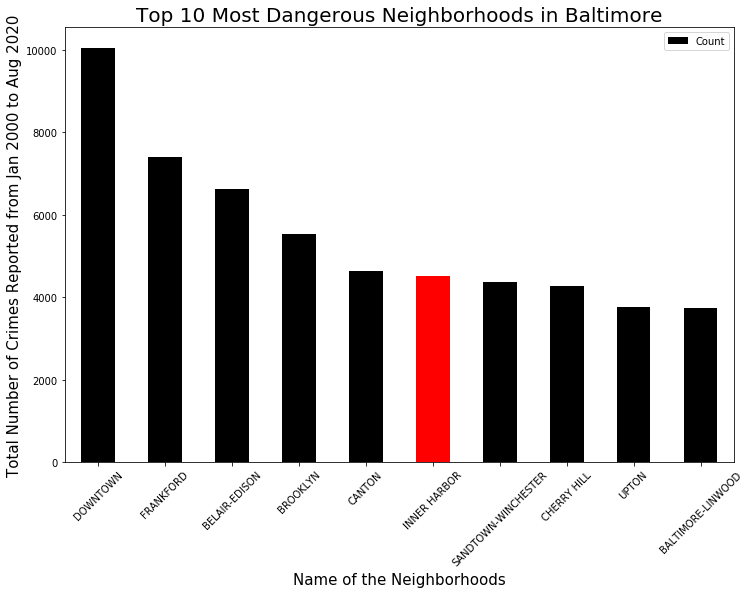

In [15]:
# Plot the top 10 most dangerous neighborhoods in Baltimore
ax = crime_top10.plot.bar(x ='Neighborhood', y = 'Count',figsize = (12,8),rot=45,color = ['black', 'black','black','black','black','red','black','black','black','black'])
plt.title('Top 10 Most Dangerous Neighborhoods in Baltimore', fontsize = 20)
plt.ylabel('Total Number of Crimes Reported from Jan 2000 to Aug 2020', fontsize = 15)
plt.xlabel('Name of the Neighborhoods', fontsize = 15)

In [16]:
# Specifically looking at Inner Harbor
crime_IH = df_crime[df_crime['Neighborhood'] == 'INNER HARBOR']
crime_IH.head()

,CrimeDate,Neighborhood
22,08/22/2020,INNER HARBOR
58,08/22/2020,INNER HARBOR
62,08/22/2020,INNER HARBOR
182,08/20/2020,INNER HARBOR
187,08/20/2020,INNER HARBOR


In [17]:
# Check the number of cases happened at Inner Harbor
crime_IH.shape

(4519, 2)

In [18]:
# Convert column CrimeDate to datatime format so we would be able to group by year or month
crime_IH['CrimeDate'] = pd.to_datetime(crime_IH['CrimeDate'])
crime_IH.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,CrimeDate,Neighborhood
22,2020-08-22,INNER HARBOR
58,2020-08-22,INNER HARBOR
62,2020-08-22,INNER HARBOR
182,2020-08-20,INNER HARBOR
187,2020-08-20,INNER HARBOR


In [19]:
# Set CrimeDate as the index for this dataframe
crime_IH.set_index('CrimeDate', inplace = True)
crime_IH.head()

,Neighborhood
CrimeDate,
2020-08-22,INNER HARBOR
2020-08-22,INNER HARBOR
2020-08-22,INNER HARBOR
2020-08-20,INNER HARBOR
2020-08-20,INNER HARBOR


In [20]:
# Create a dataframe by grouping by year for all neighborhoods in Baltimore
BG=crime_IH.groupby([(crime_IH.index.year)]).count()
BG

,Neighborhood
CrimeDate,
2014,765
2015,665
2016,669
2017,709
2018,765
2019,701
2020,245


In [21]:
#Create a second dataframe grouping by different months of the year
AG=crime_IH.groupby([(crime_IH.index.month)]).count()
AG

,Neighborhood
CrimeDate,
1,354
2,306
3,381
4,337
5,406
6,471
7,438
8,440
9,404


In [22]:
#Rename colomns
BG.rename(columns={'Neighborhood': "Count" }, inplace = True)
BG

,Count
CrimeDate,
2014,765
2015,665
2016,669
2017,709
2018,765
2019,701
2020,245


Text(0, 0.5, 'Number of Crime Cases')

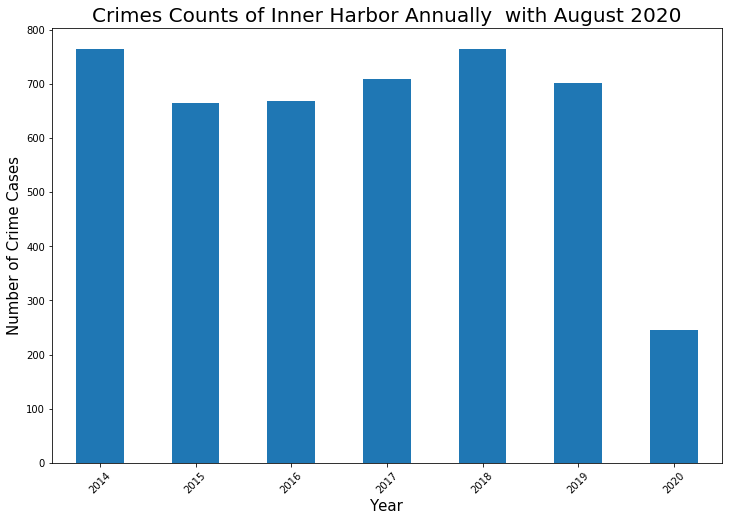

In [23]:
# Plot number of crimes based on year until Aug 2020
BG.reset_index().plot.bar(x = 'CrimeDate', y = 'Count', legend = False, figsize = (12,8),rot=45)
plt.title('Crimes Counts of Inner Harbor Annually  with August 2020', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number of Crime Cases', fontsize = 15)

In [24]:
# Extrapolate 2020 crime count
BG1 = BG.replace(245, 245*12/8)
BG1

,Count
CrimeDate,
2014,765.0
2015,665.0
2016,669.0
2017,709.0
2018,765.0
2019,701.0
2020,367.5


Text(0, 0.5, 'Number of Crime Cases')

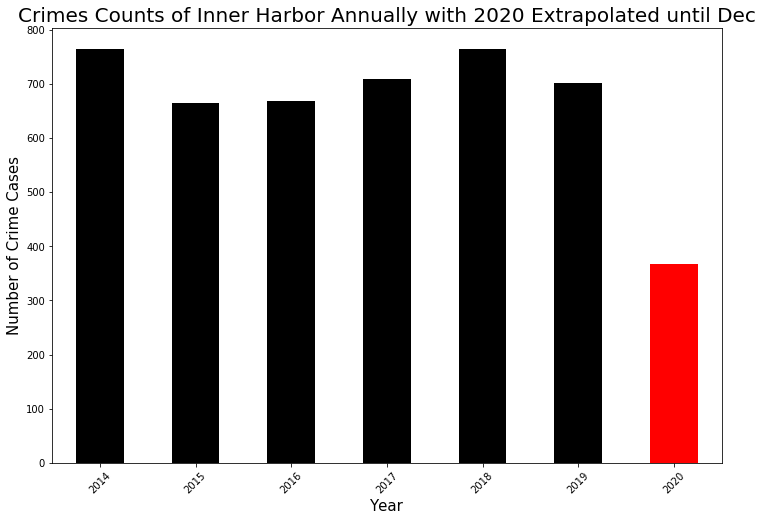

In [25]:
# Plot predicted number of crime in Inner Harbor annually until Dec 2020
BG1.reset_index().plot.bar(x = 'CrimeDate', y = 'Count', legend = False, figsize = (12,8),rot=45, color = ['black', 'black','black','black','black','black','red'])
plt.title('Crimes Counts of Inner Harbor Annually with 2020 Extrapolated until Dec', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number of Crime Cases', fontsize = 15)

In [26]:
# import seaborn
import seaborn as sns

Text(0.5, 1.0, 'Number of Crimes per Month of the Year')

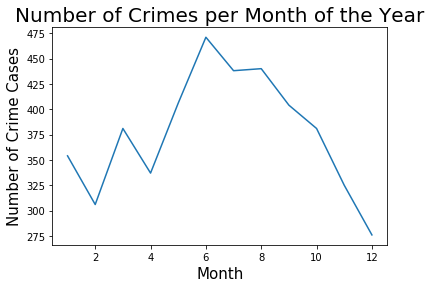

In [27]:
# Plot monthly number of crimes in Inner Harbor per month over the past 20 years to support the argument that we extrapolated
# the number of crimes from Sept to Dec in 2020. This plot shows that the number of crimes decreases towards the end of the year.
AG.reset_index(inplace = True)
bx = sns.lineplot(x="CrimeDate", y="Neighborhood", data=AG)
plt.rcParams['figure.figsize']=(15,15)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Number of Crime Cases', fontsize = 15)
plt.title('Number of Crimes per Month of the Year', fontsize = 20)

In [28]:
# Import modules for map, cluster, and plotting modules
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium #if just opened this document 
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [29]:
# Get the geographical coordinate of Inner Harbor, MD
address = '707 President St, Baltimore'
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Inner Harbor are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Inner Harbor are 39.2829231, -76.6011076.


In [30]:
CLIENT_ID = 'OEBIOKHBL1PY13SJ1ZZV5154FAYCJ34T23YLFMNWHTVO2DTC' # your Foursquare ID
CLIENT_SECRET = 'NPCHLXKJK5PC4I4MRVX5EASKV00IGRZSW2KNCICZQAA1MTZY' # your Foursquare Secret
VERSION = '20200604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OEBIOKHBL1PY13SJ1ZZV5154FAYCJ34T23YLFMNWHTVO2DTC
CLIENT_SECRET:NPCHLXKJK5PC4I4MRVX5EASKV00IGRZSW2KNCICZQAA1MTZY


In [31]:
search_query = 'Restaurant'
radius = 600
print(search_query + ' .... OK!')

Restaurant .... OK!


In [32]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=OEBIOKHBL1PY13SJ1ZZV5154FAYCJ34T23YLFMNWHTVO2DTC&client_secret=NPCHLXKJK5PC4I4MRVX5EASKV00IGRZSW2KNCICZQAA1MTZY&ll=39.2829231,-76.6011076&v=20200604&query=Restaurant&radius=600&limit=30'

In [33]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f4ab25cfc4b672a301e9da3'},
 'response': {'venues': [{'id': '4b572dd1f964a520b72928e3',
    'name': "Chiapparelli's Restaurant",
    'location': {'address': '237 S High St',
     'lat': 39.286431498352016,
     'lng': -76.6019045613243,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.286431498352016,
       'lng': -76.6019045613243},
      {'label': 'entrance', 'lat': 39.286417, 'lng': -76.601686}],
     'distance': 396,
     'postalCode': '21202',
     'cc': 'US',
     'city': 'Baltimore',
     'state': 'MD',
     'country': 'United States',
     'formattedAddress': ['237 S High St',
      'Baltimore, MD 21202',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d110941735',
      'name': 'Italian Restaurant',
      'pluralName': 'Italian Restaurants',
      'shortName': 'Italian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
       'suffix': '.png'},
      'primary': True}],
    'del

In [34]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",59953,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/chiapparell...,False,4b572dd1f964a520b72928e3,237 S High St,US,Baltimore,United States,NaN,396,"[237 S High St, Baltimore, MD 21202, United St...","[{'label': 'display', 'lat': 39.28643149835201...",39.286431,-76.601905,NaN,21202,MD,Chiapparelli's Restaurant,v-1598730643,NaN
1,"[{'id': '4bf58dd8d48988d147941735', 'name': 'D...",NaN,NaN,NaN,NaN,NaN,NaN,False,4b2af1c9f964a52095b224e3,801 S Broadway,US,Baltimore,United States,NaN,707,"[801 S Broadway, Baltimore, MD 21231, United S...","[{'label': 'display', 'lat': 39.28245356803157...",39.282454,-76.592915,NaN,21231,MD,Jimmy's Restaurant & Carry-Out,v-1598730643,NaN
2,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",479194,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/sabatinos-i...,False,4ad4c014f964a52037ef20e3,901 Fawn St,US,Baltimore,United States,NaN,390,"[901 Fawn St, Baltimore, MD 21202, United States]","[{'label': 'display', 'lat': 39.28640834307352...",39.286408,-76.601635,NaN,21202,MD,Sabatino's Italian Restaurant,v-1598730643,NaN
3,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",NaN,NaN,NaN,NaN,NaN,NaN,False,4f43917b19834bc91f57969f,1012 Eastern Ave,US,Baltimore,United States,NaN,308,"[1012 Eastern Ave, Baltimore, MD 21202, United...","[{'label': 'display', 'lat': 39.285531, 'lng':...",39.285531,-76.599904,NaN,21202,MD,Rikshaw Restaurant,v-1598730643,NaN
4,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",2242244,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/keystone-ko...,False,5dcc5fdb33c2850008753838,1350 Lancaster St,US,Baltimore,United States,Eden St,271,"[1350 Lancaster St (Eden St), Baltimore, MD 21...","[{'label': 'display', 'lat': 39.28244681646645...",39.282447,-76.598021,NaN,21231,MD,Keystone Korner Jazz Venue & Restaurant,v-1598730643,566965959


In [35]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Chiapparelli's Restaurant,Italian Restaurant,237 S High St,US,Baltimore,United States,NaN,396,"[237 S High St, Baltimore, MD 21202, United St...","[{'label': 'display', 'lat': 39.28643149835201...",39.286431,-76.601905,NaN,21202,MD,4b572dd1f964a520b72928e3
1,Jimmy's Restaurant & Carry-Out,Diner,801 S Broadway,US,Baltimore,United States,NaN,707,"[801 S Broadway, Baltimore, MD 21231, United S...","[{'label': 'display', 'lat': 39.28245356803157...",39.282454,-76.592915,NaN,21231,MD,4b2af1c9f964a52095b224e3
2,Sabatino's Italian Restaurant,Italian Restaurant,901 Fawn St,US,Baltimore,United States,NaN,390,"[901 Fawn St, Baltimore, MD 21202, United States]","[{'label': 'display', 'lat': 39.28640834307352...",39.286408,-76.601635,NaN,21202,MD,4ad4c014f964a52037ef20e3
3,Rikshaw Restaurant,Food,1012 Eastern Ave,US,Baltimore,United States,NaN,308,"[1012 Eastern Ave, Baltimore, MD 21202, United...","[{'label': 'display', 'lat': 39.285531, 'lng':...",39.285531,-76.599904,NaN,21202,MD,4f43917b19834bc91f57969f
4,Keystone Korner Jazz Venue & Restaurant,Restaurant,1350 Lancaster St,US,Baltimore,United States,Eden St,271,"[1350 Lancaster St (Eden St), Baltimore, MD 21...","[{'label': 'display', 'lat': 39.28244681646645...",39.282447,-76.598021,NaN,21231,MD,5dcc5fdb33c2850008753838
5,Galeano's Restaurant and Lounge,Food,413 S High St,US,Baltimore,United States,NaN,275,"[413 S High St, Baltimore, MD 21202, United St...","[{'label': 'display', 'lat': 39.285400390625, ...",39.285400,-76.600998,NaN,21202,MD,4f32668419836c91c7d41d61
6,Yemen Arabian Restaurant,Middle Eastern Restaurant,411 S High St,US,Baltimore,United States,NaN,279,"[411 S High St, Baltimore, MD 21202, United St...","[{'label': 'display', 'lat': 39.285431, 'lng':...",39.285431,-76.601074,NaN,21202,MD,53375775498e96f176f2744e
7,Luigi Petti Restaurant,Food,1002 Eastern Ave,US,Baltimore,United States,NaN,301,"[1002 Eastern Ave, Baltimore, MD 21202, United...","[{'label': 'display', 'lat': 39.28553009033203...",39.285530,-76.600143,NaN,21202,MD,4f32528319836c91c7cc5870
8,Velleggia's Italian Seafood Restaurant,Food,829 E Pratt St,US,Baltimore,United States,NaN,508,"[829 E Pratt St, Baltimore, MD 21202, United S...","[{'label': 'display', 'lat': 39.28725051879883...",39.287251,-76.602989,NaN,21202,MD,4f3255fd19836c91c7cdaefd
9,Boston's Restaurant & Sports Bar,Pizza Place,NaN,US,Baltimore,United States,NaN,506,"[Baltimore, MD 21202, United States]","[{'label': 'display', 'lat': 39.287266, 'lng':...",39.287266,-76.602844,NaN,21202,MD,595c10062bf9a971a29d4ee3


In [36]:
# Make a map that highlights all local restaurants near the JHU Carey Business School 
venues_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around the JHU Carey Business School 

folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Johns Hopkins Carey Business School',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)

# add all restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map